# ER and NR Global Data Comparisons
Sophia Andaloro, 08.10.2020
<br>
Plots for Snowmass 2020 LOI 

In [101]:
import nestpy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import itertools

In [102]:
#Detector identification
detector = nestpy.DetectorExample_XENON10()
# detector = nestpy.VDetector()
# Performing NEST calculations according to the given detector example       
nc = nestpy.NESTcalc(detector) #can also be left empty    

#GetInteractionObject grabs the number for the interaction you want so you don't have to always reference the dictionary. Just type e.g., 'ion'
#It just changes the name to a number for nestpy to do its work.

In [103]:
@np.vectorize
def GetYieldsVectorized(interaction, yield_type, **kwargs):
    yield_object = nc.GetYields(interaction = interaction, **kwargs)
    # returns the yields for the type of yield we are considering 
    return getattr(yield_object, yield_type)
def PhotonYield(**kwargs):
    return GetYieldsVectorized(yield_type = 'PhotonYield', **kwargs)

def ElectronYield(**kwargs):
    return GetYieldsVectorized(yield_type = 'ElectronYield', **kwargs)

# def Yield(**kwargs):
#     return {'photon' : PhotonYield(**kwargs),
#             'electron' : ElectronYield(**kwargs),
#            # What is missing?  Aren't there other parts of YieldObject?
#            }

In [104]:
import matplotlib 
import matplotlib.pylab as pl


In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
@np.vectorize
def yields():
    nc.GetYields(interaction=0, energy=energies, drift_field=200)

In [107]:
interaction = nestpy.INTERACTION_TYPE(0)  # NR
interaction

INTERACTION_TYPE.NR

In [108]:
nr_ly_data = pd.read_csv('./ly.csv', usecols = [1,2,3,4])
nr_ly_data.set_index(['Field'])
# nr_ly_data['type']='nr'
nr_ly_data['yield_type']='ly'

In [109]:
nr_ly_data.head()

,Field,keVr,Ly (ph/keVr),error,yield_type
0,60.0,7.226153,7.287600,0.437256,ly
1,60.0,9.729215,7.953372,0.477202,ly
2,60.0,12.292661,8.550609,0.513037,ly
3,60.0,14.604795,8.977276,0.538637,ly
4,60.0,17.229006,9.149018,0.548941,ly


In [110]:
some_array = np.ones((5, 3))
some_df = pd.DataFrame(some_array, columns=['nr_energy', 'yield', 'sigmas'])

nr_ly_data = pd.read_csv('./ly.csv', usecols=[1, 2, 3, 4])
nr_ly_data = nr_ly_data.set_index(['Field'])
nr_ly_fields = nr_ly_data.index.values.tolist()
nr_ly_fields = list(dict.fromkeys(nr_ly_fields))

everything = {}
#field, energy, qy
for field in nr_ly_fields:
    field_data = nr_ly_data.loc[field]
    var1 = field_data['keVr'].tolist()
    var2 = field_data['Ly (ph/keVr)'].tolist()
    var3 = field_data['error'].tolist()
    variables = {var1[i]: [var2[i], var3[i]] for i in range(len(var1) - 4)} 
    everything[field]= variables  
# everything[730][2] = [14.114, 2.8542]
#field, energy, qy, error
dahl = [60, everything[60], 'Dahl Xenon10']
dahl2 = [522, everything[522], 'Dahl Xenon10']
dahl3 = [876, everything[876], 'Dahl Xenon10']
dahl4 = [1951, everything[1951], 'Dahl Xenon10']
xe1t = [82, everything[82], 'Xenon1T 2019']
xe1t2 = [119.7, everything[116.7], 'Xenon1T 2018']
xe10 = [730, dict(itertools.islice(everything[730].items(), 11, 23)),'Manzur Xenon10']
# pandax = [395.7, everything[395.7], 'PandaX']
lux_dd = [190, everything[190], 'Lux Run03']
columbia = [190, {4.95:[8.3, 0.3], 6.6:[8.3, 0.1], 10.62:[8.6, 0.1], 13.95:[10.4, 0.1]}, 'Columbia 2018']
sorenson = [730, dict(itertools.islice(everything[730].items(), 0, 10)), 'Sorenson Xenon10']

nr_ly_experiments = [dahl, dahl2, dahl3, dahl4, xe1t, xe1t2, xe10, lux_dd, columbia, sorenson]

In [111]:
# Figure parameters common throughout all plots
version_textbox = " NEST v{0} \n nestpy v{1}".format(nestpy.__nest_version__, nestpy.__version__)
bbox = dict(boxstyle="round", fc="1.00", edgecolor='none')

In [112]:
def lightyields_nr(experiments, savefig=True, log=False):
    '''
    Goal: to make a scatter plot of all the different yields at various energies.
    '''
    plt.figure(1, figsize=(9,6))
    subplot1 = plt.subplot(1,1,1)
    for data in experiments:
        yields = []
        errors = []
        driftField = data[0]
        nr_energy = data[1].keys()
        all_vals = data[1].values()
        for lst in all_vals:
            yields.append(lst[0])
            errors.append(lst[1])
        name = [data[2], ":", driftField, "V/cm"]
        name = ' '.join(str(v) for v in name)
        subplot1.scatter(nr_energy, yields, s=10, label= name)
        plt.errorbar(nr_energy, yields, yerr=errors, fmt=',')
    
    #plotting the nest curve
    subplot1.plot(nest_curve(50)[0], nest_curve(50)[1], '--', label='NEST: 50 V/cm')
    subplot1.plot(nest_curve(200)[0], nest_curve(200)[1], '--', label='NEST: 200 V/cm')
    subplot1.plot(nest_curve(2000)[0], nest_curve(2000)[1], '--', label='NEST: 2000 V/cm')

    #Formatting to match NEST plots
    if log:
        subplot1.set_yscale('log')
    subplot1.set_xscale('log')
    subplot1.legend(loc='lower right', fontsize= 8.5, ncol=1)    
    subplot1.set_xlabel('Recoil Energy [keV]', fontsize=15)
    subplot1.set_title('Light Yields for Nuclear Recoils', fontsize=20)
    subplot1.set_ylabel('Light Yield (ph/keVr)', fontsize=15) 
    subplot1.margins(0)
    
    subplot1.text(1, 10, version_textbox, bbox=bbox, horizontalalignment='right', fontsize='x-large')
    if savefig: 
        plt.savefig('ly.png')

In [201]:
things = pd.read_csv('./qy.csv', usecols=[0])
things[130:140]

,Unnamed: 0
130,NaN
131,NaN
132,NaN
133,NaN
134,NaN
135,Sor'09
136,10.1016/j.nima.2008.12.197
137,NaN
138,NaN
139,NaN


In [199]:
sorenson

[730,
 {2.0: [14.114, 2.8542],
  5.0: [7.7035, 0.733015],
  10.0: [5.8234, 0.45038999999999996],
  15.0: [5.5368, 0.543155],
  25.0: [4.8472, 0.395175],
  50.0: [3.6642, 0.21861999999999998],
  100.0: [2.5387, 0.18023],
  5.7: [6.1812, 0.21316999999999997],
  9.6: [5.5623, 0.21543],
  14.253: [5.3129, 0.21939],
  18.577: [5.3373, 0.231055],
  29.42: [4.3819, 0.57052],
  37.753: [3.9072, 0.47630500000000003],
  54.452: [2.9266, 0.6587149999999999],
  69.332: [2.4926, 0.499555]},
 'Sorenson XENON10']

In [183]:
some_array = np.ones((5, 3))
some_df = pd.DataFrame(some_array, columns=['nr_energy', 'yield', 'sigmas'])

nr_qy_data = pd.read_csv('./qy.csv', usecols=[1, 3, 4, 16, 17])
nr_qy_data = nr_qy_data.set_index(['Field'])
nr_qy_fields = nr_qy_data.index.values.tolist()
nr_qy_fields = list(dict.fromkeys(nr_qy_fields))

everything = {}
#field, energy, qy
for field in nr_qy_fields:
    field_data = nr_qy_data.loc[field]
    var1 = field_data['EnergyCorr'].tolist()
    var2 = field_data['Q_y (e-/keVr)'].tolist()
    var3 = field_data['error'].tolist()
    variables = {var1[i]: [var2[i], var3[i]] for i in range(len(var1) - 4)} 
    everything[field]= variables  
everything[730][2] = [14.114, 2.8542]
#field, energy, qy, error
dahl = [60, everything[60], 'Dahl Case']
dahl2 = [522, everything[522], 'Dahl Case']
dahl3 = [876, everything[876], 'Dahl Case']
dahl4 = [1951, everything[1951], 'Dahl Case']
xe1t = [82, everything[82], 'XENON1T 2019']
xe1t2 = [119.7, everything[116.7], 'XENON1T 2018']
xe10 = [730, dict(itertools.islice(everything[730].items(), 16, 24)),'XENON10']
case = [100, everything[100], 'Dahl Case']
# pandax = [395.7, everything[395.7], 'PandaX']
lux_dd = [190, everything[190], 'LUX Run03']
columbia = [190, {4.95:[5.9, 0.3], 6.6:[5.8, 0.1], 10.62:[5.7, 0.1], 13.95:[6.2, 0.1]}, 'Columbia 2018']
livermore = [220, everything[220], 'Livermore 2019']
sorenson = [730, dict(itertools.islice(everything[730].items(), 0, 15)), 'Sorenson XENON10']

nr_qy_experiments = [dahl, dahl2, dahl3, dahl4, xe1t, xe1t2, xe10, lux_dd, columbia, sorenson, case, livermore]
# nr_qy_experiments.sort(key=lambda x: int(x[0]))

In [147]:
def nest_nr_qy(field):
    fields = np.asarray([field])
    energies = np.logspace(-1, 2, 1000,)
    energies = np.reshape(energies, (1000,1))
    energies = np.broadcast_to(energies, (len(energies), len(fields)))
    kwargs = {'energy': energies, 'drift_field': fields}
    nr_electrons = ElectronYield(interaction=nestpy.INTERACTION_TYPE.NR, **kwargs)/energies #yields/keV
    return (energies, nr_electrons)

def nest_nr_ly(field):
    fields = np.asarray([field])
    energies = np.logspace(-1, 2, 1000,)
    energies = np.reshape(energies, (1000,1))
    energies = np.broadcast_to(energies, (len(energies), len(fields)))
    kwargs = {'energy': energies, 'drift_field': fields}
    nr_photons = PhotonYield(interaction=nestpy.INTERACTION_TYPE.NR, **kwargs)/energies #yields/keV
    return (energies, nr_photons)

In [148]:
markers = ['s','v','^','P','8','o','D','d','s','v','^','P','8','o','D','d',]

In [149]:
def nr_ly(i=0,j=0):
    ax1 = axs[i,j]
    ax1.plot(nest_nr_ly(50)[0], nest_nr_ly(50)[1], '--', label='NEST: 50 V/cm')
    ax1.plot(nest_nr_ly(200)[0], nest_nr_ly(200)[1], '--', label='NEST: 200 V/cm')
    ax1.plot(nest_nr_ly(2000)[0], nest_nr_ly(2000)[1], '--', label='NEST: 2000 V/cm')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim(.2,1e2)
    ax1.set_ylim(1,20)
    ax1.set_yticks([1, 5, 10, 20])
    ax1.set_xticks([1e0, 1e1, 1e2])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.set_xlabel('Recoil Energy [keV]', fontsize=15)
    ax1.set_title('Light Yields for Nuclear Recoils', fontsize=18)
    ax1.set_ylabel('Light Yield [n$_\gamma$/keV]', fontsize=15) 
    ax1.margins(0)
    ax1.minorticks_on()
    ax1.grid()
    for i, data in enumerate(nr_ly_experiments):
        yields = []
        errors = []
        driftField = data[0]
        nr_energy = data[1].keys()
        all_vals = data[1].values()
        for lst in all_vals:
            yields.append(lst[0])
            errors.append(lst[1])
        name = [data[2], ":", driftField, "V/cm"]
        name = ' '.join(str(v) for v in name)
        ax1.scatter(nr_energy, yields, s=50, marker=markers[i], c=colors[i]) #,label= name)
        ax1.errorbar(nr_energy, yields, yerr=errors, c=colors[i], fmt=',')

In [176]:
def nr_qy(i=1,j=0):
    ax1 = axs[i,j]
    ax1.plot(nest_nr_qy(50)[0], nest_nr_qy(50)[1], '--',label='NEST NR: 50 V/cm' )
    ax1.plot(nest_nr_qy(200)[0], nest_nr_qy(200)[1], '--',label='NEST NR: 200 V/cm')
    ax1.plot(nest_nr_qy(2000)[0], nest_nr_qy(2000)[1], '--',label='NEST NR: 2000 V/cm')
    ax1.set_xscale('log')
#     ax1.set_yscale('log')
    ax1.set_xlim(.2,1e2)
    ax1.set_ylim(1,12)
    ax1.set_yticks([1, 5, 10, 12])
    ax1.set_xticks([1e0, 1e1, 1e2])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax1.set_xlabel('Recoil Energy [keV]', fontsize=15)
    ax1.set_title('Charge Yields for Nuclear Recoils', fontsize=18)
    ax1.set_ylabel('Charge Yield [n$_e$/keV]', fontsize=15) 
    ax1.margins(0)
    ax1.minorticks_on()
    ax1.grid()
    for i, data in enumerate(nr_qy_experiments):
        yields = []
        errors = []
        driftField = data[0]
        nr_energy = data[1].keys()
        all_vals = data[1].values()
        for lst in all_vals:
            yields.append(lst[0])
            errors.append(lst[1])
        name = [data[2], ":", driftField, "V/cm"]
        name = ' '.join(str(v) for v in name)
        ax1.scatter(nr_energy, yields, s=50, marker=markers[i],c=colors[i],label= name)
        ax1.errorbar(nr_energy, yields, yerr=errors, c=colors[i], fmt=',')
    return ax1

In [151]:
def er_ly(i=0,j=1):
    ax1 = axs[i,j]
#     plot_field_range(ax1,d,150,200)
    ax1.set_xscale('log')
#     ax1.set_yscale('log')
    ax1.set_xticks([1e0, 1e1, 1e2, 1e3])
    ax1.set_yticks([0, 10, 20,30,40,50,60,70,80])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.set_xlabel('Recoil Energy [keV]', fontsize=15)
    ax1.set_title(r'Light Yields for $\beta$-Electronic Recoils', fontsize=18)
    ax1.set_ylabel('Light Yield [n$_\gamma$/keV]', fontsize=15)
    ax1.margins(0)
    ax1.set_ylim((0, 60))
    
    ax1.minorticks_on()
    ax1.grid()
    ax1.errorbar(lux_tritium_energies, lux_tritium_ly, yerr= lux_tritium_error, marker='s', fmt='rs', alpha=0.8,ms=8) #lux tritium 
    ax1.errorbar(2.8, 24.7, yerr= 2.15, marker='D', color='mediumorchid',fmt='D', ms=10) #PixEY 198 Ar37
#     ax1.errorbar(lux_energies, lux_ly, yerr= lux_error, marker='x', color='purple', fmt='x', ms=10) # 127Xe Lux 
    ax1.plot(energies[:,0], beta_photons[:,0], 'r--', label=r'NEST, $\beta$-ER (150 V/cm)')
    ax1.plot(energies[:,0], beta_photons[:,2], 'b--', label=r'NEST, $\beta$-ER (200 V/cm)')
    dname='LUX_postWS_14C'
    ax1.errorbar(lux_14c_energies,lux_14c_ly,yerr=lux_14c_error,xerr=array(lux_14c_energies_err),
             fmt=d[dname]['mstyle'],
             color=lighten_color(d[dname]['mcolor'],1),
             markersize=d[dname]['msize'],
#              label=d[dname]['label']+' ({:d} V/cm)'.format(int(field))
            )
    dname='LUX_postWS_3H'
    ax1.errorbar(lux_3h_energies,lux_3h_ly,yerr=lux_3h_error,xerr=array(lux_3h_energies_err),
             fmt=d[dname]['mstyle'],
             color=lighten_color(d[dname]['mcolor'],1),
             markersize=d[dname]['msize'],
#              label=d[dname]['label']+' ({:d} V/cm)'.format(int(field))
            )

## ER Data hard read-in
Had to digitize this data. 

In [152]:
# ER LY Data 
#190 V/cm drift field edition 
neriX_Energies = [2.5,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98,102,106,110]
neriX_LY = [26.9,32.9,38.1,40.3,42.6,43.1,43.6,44.1,44.7,45.2,45.2,45.8,45.6,45.7,46.1,45.9,46.2,45.8,45.9,45.7,45.2,45.7,45.1,45.4,46.5,46.6,45.9,45.9,45.2,44.7,44.3,44.3,43.7,42.5,42.4,41.2,40.8,40.3,39.9,39.1,38,38.4,37.3,37.8,36]
LY_error = [2.4105,1.9805,1.9145,2.0135,2.117,2.1395,2.062,2.0845,2.1115,2.134,2.134,2.161,2.152,2.1565,2.1745,2.1655,2.179,2.161,2.1655,2.1565,2.134,2.1565,2.1295,1.6258,1.6555,1.6582,1.5393,1.5393,1.5204,1.5069,1.3961,1.4961,1.3799,1.3475,1.3448,1.3124,1.3016,1.3881,1.3773,1.3557,1.426,1.3368,1.3071,1.4206,1.472]

In [153]:
lux_energies = [5.2,33.2,41.55,163.9,208,236.1,410,583.2,609.3,661.7]
lux_ly = [39.2,49.5,53.4,41.9,43.1,43.9,42.4,35.5,37.4,35.1]
lux_error = [2.9,1.7,1.4,1.4,1.6,1.3,1.4,1.2,1.1,1]

lux_tritium_energies = [1.3,1.5,2,2.5,3,3.5,4,4.5,5,5.2,5.5,6,6.5,7,7.5,8,9,10,11,12,13,14,16,17]
lux_tritium_ly = [14.6,17.3,22.3,27.4,31.5,33.8,35.8,37.5,38.4,38.9,39.5,40.4,41.7,41.7,42.7,42.9,43.8,44.7,45.4,46,46.5,47.1,46.4,44.9]
lux_tritium_error = [2.2,1.9,2.4,2.5,2.3,2,2.2,2,1.9,2,2.1,2,2,1.7,2,1.9,1.7,2,1.7,1.7,1.5,1.6,2.5,2.5]

In [154]:
def er_qy(i=1,j=1):
    ax1 = axs[i,j]
    plot_field_range(ax1,d_new,150,200)
    
    ax1.set_xscale('log')
#     ax1.set_yscale('log')
    ax1.set_xticks([1e0, 1e1, 1e2, 1e3])
    ax1.set_yticks([20,30,40,50,60,70,80,90])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.set_xlabel('Recoil Energy [keV]', fontsize=15)
    ax1.set_title(r'Charge Yields for $\beta$-Electronic Recoils', fontsize=18)
    ax1.set_ylabel('Charge Yield [n$_e$/keV]', fontsize=15)
    ax1.margins(0)
    ax1.minorticks_on()

    ax1.set_ylim((20,90))
    ax1.plot(energies[:,0], beta_electrons[:,0], 'r--', label=r'NEST, $\beta$-ER (150 V/cm)')
    ax1.plot(energies[:,0], beta_electrons[:,2], 'b--', label=r'NEST, $\beta$-ER (200 V/cm)')
    ax1.grid()
    return ax1

In [155]:
n = len(nr_qy_experiments)
colors = pl.cm.nipy_spectral(np.linspace(0,1,n))/1.1 #plasma ? 

In [156]:
#global plotting settings
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['xtick.direction']='out'
plt.rcParams['ytick.direction']='out'

plt.rcParams['xtick.major.size']=10
plt.rcParams['ytick.major.size']=10
plt.rcParams['xtick.major.pad']=5
plt.rcParams['ytick.major.pad']=5

plt.rcParams['xtick.minor.size']=5
plt.rcParams['ytick.minor.size']=5
plt.rcParams['xtick.minor.pad']=5
plt.rcParams['ytick.minor.pad']=5

In [170]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': False})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

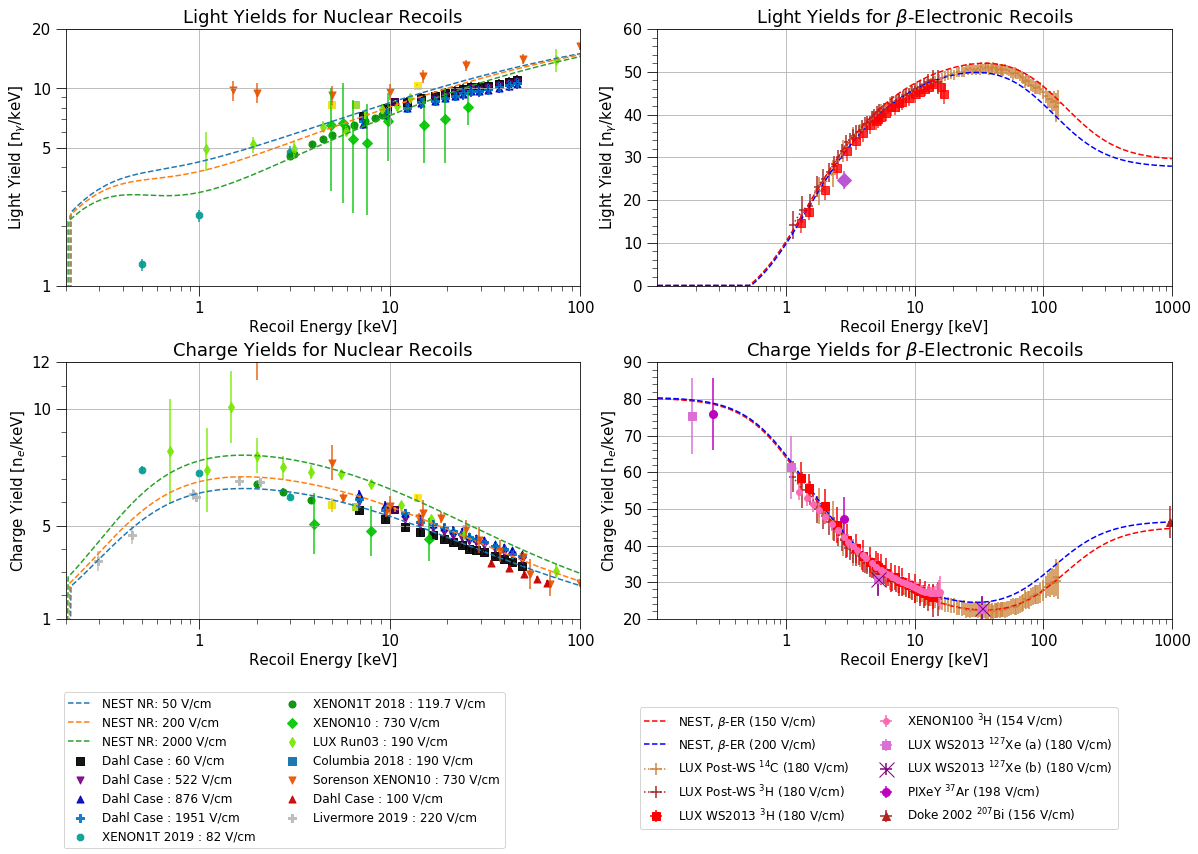

In [188]:
fig, axs = plt.subplots(2, 2, figsize=(16,13), sharex=False)
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.25, wspace=0.15, hspace=0.3)
nr_ly()

ax1 = nr_qy()
er_ly()
ax2 = er_qy()
# ax1.legend(loc='lower right', fontsize= 8., ncol=2)  
fig.legend(ax1.get_legend_handles_labels()[0], ax1.get_legend_handles_labels()[1], 
           loc='lower left',
           ncol=2, 
           fontsize=12, 
           markerscale=1.,
#            title='Nuclear Recoils',
           bbox_to_anchor=(0.05, 0, 0.5, 0.2),
          )

fig.legend(ax2.get_legend_handles_labels()[0], ax2.get_legend_handles_labels()[1], 
           loc='lower left',
#            title=r'$\beta$-Electronic Recoils',
           ncol=2, 
           fontsize=12, 
           markerscale=1.,
           bbox_to_anchor=(0.55, 0.02, 0.5, 0.2),
          )
# plt.tight_layout()
fig.savefig('g3_plot.eps', bbox_inches = "tight")

In [126]:
fields=np.asarray([150., 180., 200.])
energies = np.logspace(-1, 3, 1000,)
energies = np.reshape(energies, (1000,1))
energies = np.broadcast_to(energies, (len(energies), len(fields)))

kwargs = {'energy': energies, 'drift_field': fields}
beta_electrons = ElectronYield(interaction=nestpy.INTERACTION_TYPE.beta, **kwargs)/energies #yields/keV
gamma_electrons = ElectronYield(interaction=nestpy.INTERACTION_TYPE.gammaRay, **kwargs)/energies
beta_photons = PhotonYield(interaction=nestpy.INTERACTION_TYPE.beta, **kwargs)/energies #yields/keV
gamma_photons = PhotonYield(interaction=nestpy.INTERACTION_TYPE.gammaRay, **kwargs)/energies

fields=np.asarray([50., 200., 2000.])
energies = np.logspace(-1, 3, 1000,)
energies = np.reshape(energies, (1000,1))
energies = np.broadcast_to(energies, (len(energies), len(fields)))

nr_electrons = ElectronYield(interaction=nestpy.INTERACTION_TYPE.NR, **kwargs)/energies
nr_photons = PhotonYield(interaction=nestpy.INTERACTION_TYPE.NR, **kwargs)/energies


# ER data grab

In [127]:
import json
%run './ER_data/ER_fitting_tools.py'

In [128]:
with open('./ER_data/ER_yields_data.dat','r') as f:
    d=json.load(f) 

In [129]:
d_new = {}
for key in d.keys():
#     print(key)
    if d[key]['interaction_type'] not in ['Compton', 'photoabsorption']:
        d_new[key] = d[key]

In [130]:
d['Doke_976']['label'] = 'Doke 2002 $^{207}$Bi'

In [159]:
d['Xe100_3H']['label'] = 'XENON100 $^{3}$H'

In [131]:
dname='LUX_postWS_14C'
fname='180_Vcm'
field=array(d[dname]['data'][fname]['field'])
lux_14c_ly = 73 - array(d[dname]['data'][fname]['QY'])
lux_14c_energies = array(d[dname]['data'][fname]['energy'])
lux_14c_energies_err=array(d[dname]['data'][fname]['energy_pm'])
lux_14c_error = array(d[dname]['data'][fname]['QY_pm_sys']) + array(d[dname]['data'][fname]['QY_pm_stat'])

dname='LUX_postWS_3H'
field=array(d[dname]['data'][fname]['field'])
lux_3h_ly = 73 - array(d[dname]['data'][fname]['QY'])
lux_3h_energies = array(d[dname]['data'][fname]['energy'])
lux_3h_energies_err=array(d[dname]['data'][fname]['energy_pm'])
lux_3h_error =  array(d[dname]['data'][fname]['QY_pm_sys']) + array(d[dname]['data'][fname]['QY_pm_stat'])